In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from funcs import *
from datas import *
from models import *
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab, GloVe
from collections import Counter

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Fix random seed for reproducibility
same_seeds(1689)

cuda


In [5]:
train_texts, train_labels = read_data("aclImdb/train")
test_texts, test_labels = read_data("aclImdb/test")

In [7]:
tokenizer = get_tokenizer('basic_english')
tokenized_texts = [tokenizer(text) for text in train_texts]
vectors = GloVe(name='6B', dim=100)

# Count the frequency of each token in the text data
counter = Counter(token for text in tokenized_texts for token in text)
specials = ['<unk>', '<pad>', '<bos>', '<eos>']
vocab = Vocab(counter, vectors=vectors, specials=specials)

In [8]:
dataset = CustomTextDataset1(train_texts, train_labels, vocab, tokenizer)
train_size = int(len(dataset) * 0.8)
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [42]:
pretrained_embeddings = vocab.vectors
train_losses, train_accs, valid_losses, valid_accs = train_valid1(
    LSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=64, num_classes=2, 
                   num_layers=2, bidirectional=True, dropout=0.5, 
                   pretrained_embeddings=pretrained_embeddings), 
    train_dataset, val_dataset, lr=1e-3, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [1], train loss: [0.0102], train accuracy: [0.6177]
epoch [1], valid loss: [0.0091], valid accuracy: [0.7152]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [2], train loss: [0.0095], train accuracy: [0.6891]
epoch [2], valid loss: [0.0086], valid accuracy: [0.7494]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [3], train loss: [0.0076], train accuracy: [0.7859]
epoch [3], valid loss: [0.0070], valid accuracy: [0.8108]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [4], train loss: [0.0063], train accuracy: [0.8274]
epoch [4], valid loss: [0.0060], valid accuracy: [0.8418]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [5], train loss: [0.0059], train accuracy: [0.8397]
epoch [5], valid loss: [0.0058], valid accuracy: [0.8474]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [6], train loss: [0.0054], train accuracy: [0.8582]
epoch [6], valid loss: [0.0054], valid accuracy: [0.8538]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [7], train loss: [0.0050], train accuracy: [0.8678]
epoch [7], valid loss: [0.0053], valid accuracy: [0.8630]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [8], train loss: [0.0049], train accuracy: [0.8711]
epoch [8], valid loss: [0.0051], valid accuracy: [0.8632]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [9], train loss: [0.0046], train accuracy: [0.8808]
epoch [9], valid loss: [0.0051], valid accuracy: [0.8720]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0044], train accuracy: [0.8863]
epoch [10], valid loss: [0.0053], valid accuracy: [0.8588]


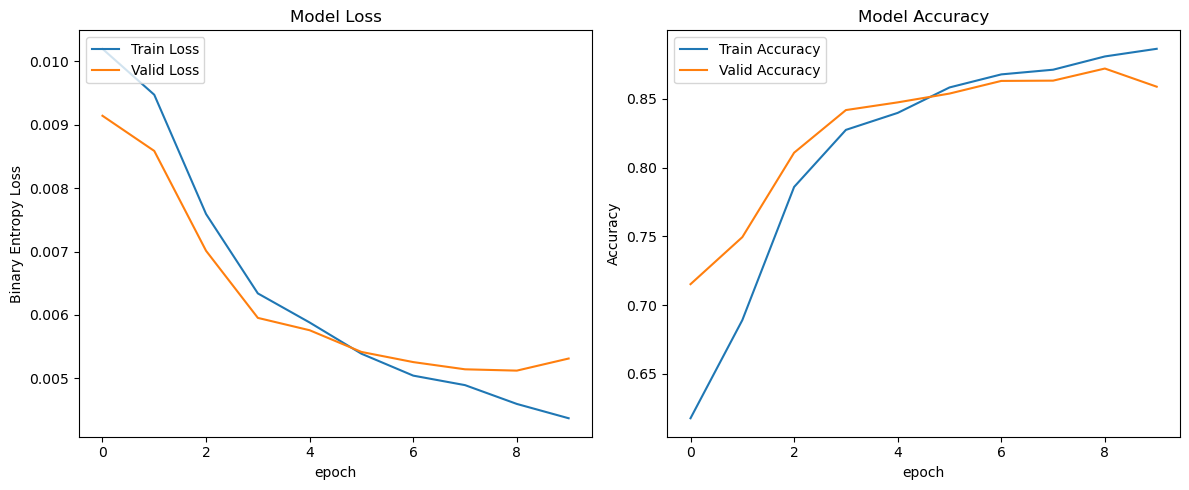

In [46]:
show_process(train_losses, train_accs, valid_losses, valid_accs, "Valid")

# Parameters Tuning

In [13]:
pretrained_embeddings = vocab.vectors
train_losses, train_accs, valid_losses, valid_accs = train_valid1(
    LSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=64, num_classes=2, 
                   num_layers=5, bidirectional=True, dropout=0.5, 
                   pretrained_embeddings=pretrained_embeddings), 
    train_dataset, val_dataset, lr=1e-3, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [1], train loss: [0.0108], train accuracy: [0.5372]
epoch [1], valid loss: [0.0109], valid accuracy: [0.4972]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [2], train loss: [0.0104], train accuracy: [0.5809]
epoch [2], valid loss: [0.0098], valid accuracy: [0.6658]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [3], train loss: [0.0104], train accuracy: [0.5865]
epoch [3], valid loss: [0.0110], valid accuracy: [0.4972]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [4], train loss: [0.0103], train accuracy: [0.5989]
epoch [4], valid loss: [0.0106], valid accuracy: [0.6668]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [5], train loss: [0.0083], train accuracy: [0.7430]
epoch [5], valid loss: [0.0079], valid accuracy: [0.7580]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [6], train loss: [0.0071], train accuracy: [0.7984]
epoch [6], valid loss: [0.0066], valid accuracy: [0.8186]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [7], train loss: [0.0068], train accuracy: [0.8114]
epoch [7], valid loss: [0.0063], valid accuracy: [0.8342]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [8], train loss: [0.0063], train accuracy: [0.8225]
epoch [8], valid loss: [0.0063], valid accuracy: [0.8232]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [9], train loss: [0.0058], train accuracy: [0.8411]
epoch [9], valid loss: [0.0057], valid accuracy: [0.8572]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0057], train accuracy: [0.8486]
epoch [10], valid loss: [0.0052], valid accuracy: [0.8624]


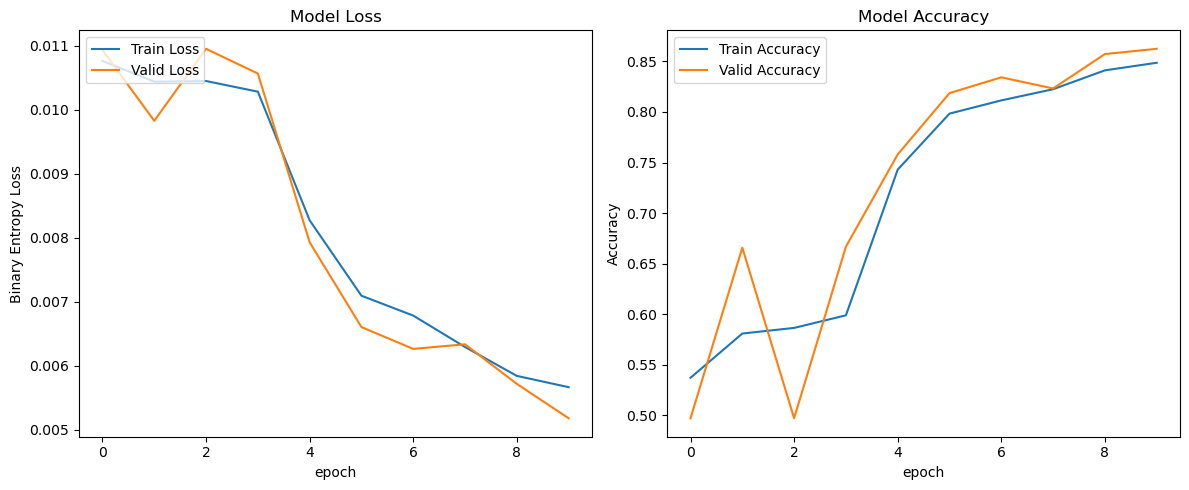

In [14]:
show_process(train_losses, train_accs, valid_losses, valid_accs, "Valid")

# Train and Test

In [6]:
lr = 1e-2
embedding_dim = 300
hidden_dim = 96 
num_layers = 3
bidirectional = True

In [7]:
tokenizer = get_tokenizer('basic_english')
tokenized_texts = [tokenizer(text) for text in train_texts]
vectors = GloVe(name='6B', dim=embedding_dim)

# Count the frequency of each token in the text data
counter = Counter(token for text in tokenized_texts for token in text)
specials = ['<unk>', '<pad>', '<bos>', '<eos>']
vocab = Vocab(counter, vectors=vectors, specials=specials)

dataset = CustomTextDataset1(train_texts, train_labels, vocab, tokenizer)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_embeddings = vocab.vectors
model = LSTMClassifier(vocab_size=len(vocab), embedding_dim=embedding_dim, hidden_dim=hidden_dim, 
                       num_classes=2, num_layers=num_layers, bidirectional=bidirectional, 
                       dropout=0.5, pretrained_embeddings=pretrained_embeddings)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5, lr=lr)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98, last_epoch=-1)

batch_size = 64
n_epochs = 25
# using training set and validation set to train the model
train_loader = DataLoader(dataset, collate_fn=collate_batch, batch_size=batch_size, shuffle=True)

train_losses = []
train_accs = []

for epoch in range(1, n_epochs + 1):
    train_loss = 0
    train_acc = 0

    model.train()
    for label, text in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(text).squeeze(1).float()
        loss = criterion(outputs, label.long())
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.round(torch.sigmoid(outputs))
        _, predicted = torch.max(preds, dim=1)
        train_acc += torch.sum(predicted == label).item()
    scheduler.step()

    epoch_train_loss = train_loss / len(train_loader.dataset)
    epoch_train_acc = train_acc / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)
    print("epcoh [%d], train loss: [%.4f], train accuracy: [%.4f]" % (epoch, epoch_train_loss, epoch_train_acc))

  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [1], train loss: [0.0083], train accuracy: [0.7370]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [2], train loss: [0.0058], train accuracy: [0.8486]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [3], train loss: [0.0050], train accuracy: [0.8718]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [4], train loss: [0.0047], train accuracy: [0.8870]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [5], train loss: [0.0045], train accuracy: [0.8884]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [6], train loss: [0.0040], train accuracy: [0.9020]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [7], train loss: [0.0038], train accuracy: [0.9067]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [8], train loss: [0.0037], train accuracy: [0.9130]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [9], train loss: [0.0034], train accuracy: [0.9224]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0034], train accuracy: [0.9181]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [11], train loss: [0.0034], train accuracy: [0.9192]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [12], train loss: [0.0030], train accuracy: [0.9288]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [13], train loss: [0.0029], train accuracy: [0.9325]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [14], train loss: [0.0028], train accuracy: [0.9353]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [15], train loss: [0.0026], train accuracy: [0.9413]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [16], train loss: [0.0023], train accuracy: [0.9494]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [17], train loss: [0.0022], train accuracy: [0.9517]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [18], train loss: [0.0022], train accuracy: [0.9518]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [19], train loss: [0.0022], train accuracy: [0.9519]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [20], train loss: [0.0019], train accuracy: [0.9594]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [21], train loss: [0.0018], train accuracy: [0.9616]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [22], train loss: [0.0017], train accuracy: [0.9636]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [23], train loss: [0.0017], train accuracy: [0.9631]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [24], train loss: [0.0016], train accuracy: [0.9630]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [25], train loss: [0.0018], train accuracy: [0.9599]


In [13]:
test_dataset = CustomTextDataset1(test_texts, test_labels, vocab, tokenizer)

# Create a data loader for the test dataset
test_loader = DataLoader(test_dataset, collate_fn=collate_batch, batch_size=batch_size, shuffle=False)

test_loss = 0
test_acc = 0
model.eval()
for label, text in tqdm(test_loader):
    with torch.no_grad():
        outputs = model(text)
        loss = criterion(outputs, label.long())
        
        test_loss += loss.item()
        preds = torch.round(torch.sigmoid(outputs))
        _, predicted = torch.max(preds, dim=1)
        test_acc += torch.sum(predicted == label).item()
test_loss = test_loss / len(test_loader.dataset)
test_acc = test_acc / len(test_loader.dataset)
print("test loss: [%.4f], test accuracy: [%.4f]" % (test_loss, test_acc))


  0%|          | 0/391 [00:00<?, ?it/s]

test loss: [0.0062], test accuracy: [0.8798]


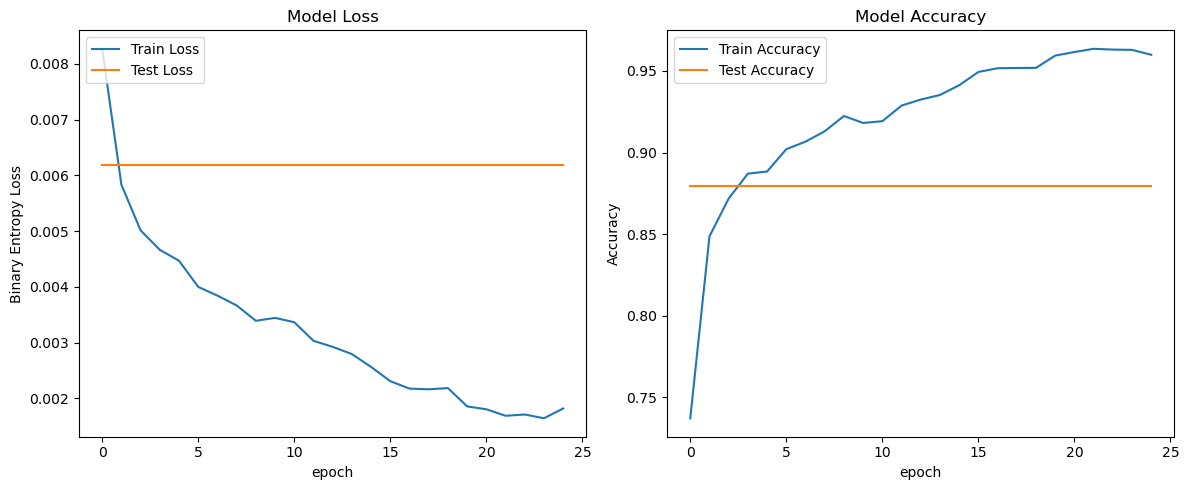

In [14]:
test_losses = [test_loss for _ in range(n_epochs)]
test_accs = [test_acc for _ in range(n_epochs)]
show_process(train_losses, train_accs, test_losses, test_accs, "Test") 